In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [21]:
sal_by_college = pd.read_csv("salaries-by-college-type.csv")
sal_by_region = pd.read_csv("salaries-by-region.csv")
sal_by_degree = pd.read_csv("degrees-that-pay-back.csv")

In [22]:
#print(sal_by_region.head)
#print(sal_by_college.head)
sal_complete  = sal_by_college.merge(sal_by_region, on="School Name")
#print(sal_complete.head)
df = sal_complete[["School Name", "School Type", "Region", "Starting Median Salary_x"]]
names = df[["School Name"]].values
X = df[["School Type", "Region"]].apply(lambda x: pd.factorize(x)[0]).values
y = df["Starting Median Salary_x"].str.replace(r"\D", "").astype("float").values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

C:\Users\awhit\AppData\Local\Temp\ipykernel_25748\2618506001.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  y = df["Starting Median Salary_x"].str.replace(r"\D", "").astype("float").values


In [23]:
from sklearn.tree import DecisionTreeRegressor


RegTree1 = DecisionTreeRegressor(max_depth=2, random_state=99)
RegTree1.fit(X_train, y_train)

y_train_err = y_train - RegTree1.predict(X_train)

RegTree2 = DecisionTreeRegressor(max_depth=2, random_state=99)
RegTree2.fit(X_train, y_train_err)

y_train_err2 = y_train_err- RegTree2.predict(X_train)

RegTree3 = DecisionTreeRegressor(max_depth=2, random_state=99)
RegTree3.fit(X_train, y_train_err2)


DecisionTreeRegressor(max_depth=2, random_state=99)

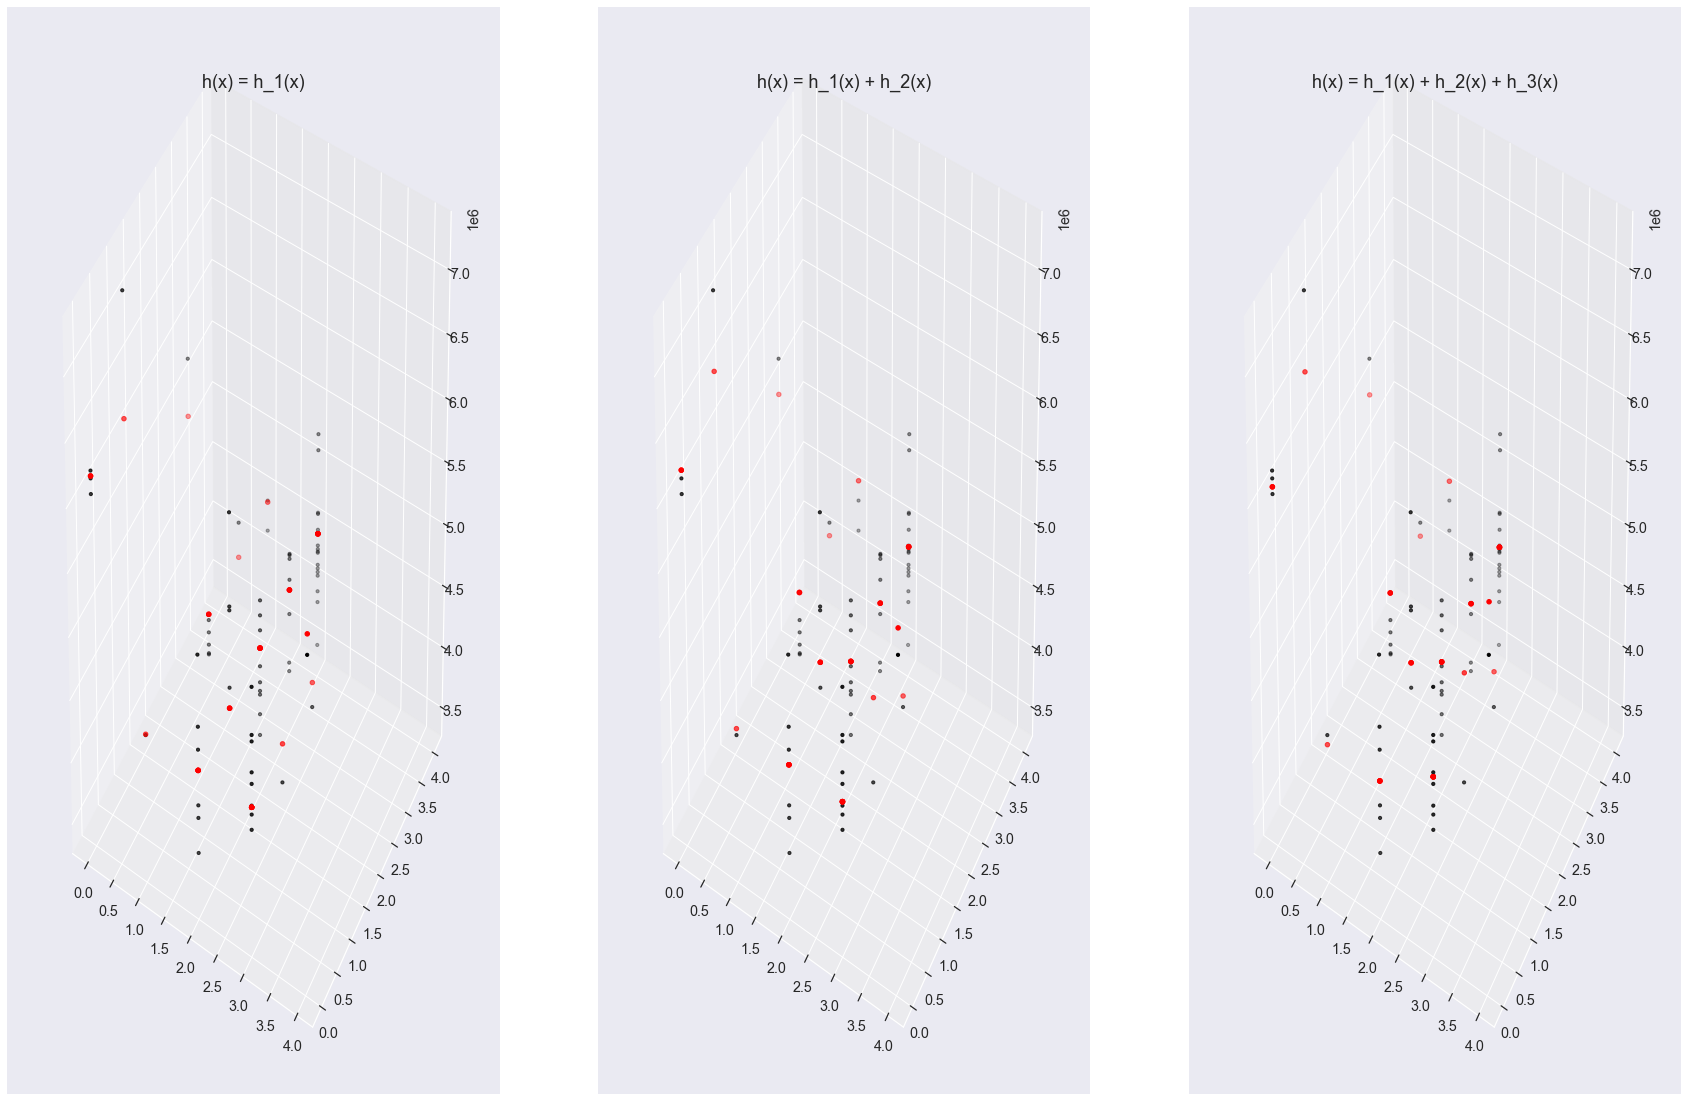

In [25]:
X_test0  = np.asarray([x[0] for x in X_test])
X_test1 = np.asarray([x[1] for x in X_test])
y_test = np.asarray(y_test)

fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')

ax1.scatter3D(X_test0, X_test1, y_test,  s=10, color = "black")
ax1.scatter3D(X_test0, X_test1,  RegTree1.predict(X_test), color = "red")
ax1.set_title("h(x) = h_1(x)", fontsize = 18)

ax2.scatter3D(X_test0, X_test1, y_test,  s=10, color = "black")
ax2.scatter3D(X_test0, X_test1, RegTree1.predict(X_test)+RegTree2.predict(X_test), color = "red")
ax2.set_title("h(x) = h_1(x) + h_2(x)", fontsize = 18)

ax3.scatter3D(X_test0, X_test1, y_test,  s=10, color = "black")
ax3.scatter3D(X_test0, X_test1, RegTree1.predict(X_test)+RegTree2.predict(X_test)+RegTree3.predict(X_test), color = "red")
ax3.set_title("h(x) = h_1(x) + h_2(x) + h_3(x)", fontsize = 18)
plt.show()